In [1]:
# 1.Introduction
# 2.Data Understanding
#   2.1 İmporting Libraries and Loading Data
#   2.2 Feature Analysis
#   2.3 Visualization
# 3.Data Preparation
#   3.1 Deleting Unnecessary Variables
#   3.2 Outlier Treatment
#   3.3 Missing Value Treatment
#      3.3.1 Age
#      3.3.2 Embarked
#      3.3.3 Fare
#      3.3.4 Cabin
#   3.4 Variables Transformation
#      3.4.1 Embarked
#      3.4.2 Sex
#      3.4.3 Name-Title
#      3.4.4 AgeGroup
#      3.4.5 Fare
#   3.5 Feature Engineering
#      3.5.1 Family Size
#      3.5.2 Embarked-Title
#      3.5.3 Pclass
# 4.Modelling
#   4.1 Spliting The Train Data
#   4.2 Model Tuning
#   4.3 Deployment
 

# İntroduction

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


 **Variables**


        Survival: Survival -> 0 = No, 1 = Yes

        Pclass: Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd

        Sex: Sex

        Age: Age in years

        SibSp: # of siblings / spouses aboard the Titanic

        Parch: # of parents / children aboard the Titanic

        Ticket: Ticket number

        Fare: Passenger fare

        Cabin: Cabin number

        Embarked: Port of Embarkation -> C = Cherbourg, Q = Queenstown, S = Southampton



    

# Data Understanding 

## **Importing Librarires and Loading Data**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
    import numpy as np
    import pandas as pd

    # data visualization libraries:
    import matplotlib.pyplot as plt
    import seaborn as sns

    # to ignore warnings:
    import warnings
    warnings.filterwarnings('ignore')

    # to display all columns:
    pd.set_option('display.max_columns', None)

    from sklearn.model_selection import train_test_split, GridSearchCV


In [4]:
# Read train and test data with pd.read_csv():
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [5]:
train = train_data.copy()
test = test_data.copy()

In [6]:
# I want to combine test and train to make operations easier

df=pd.concat([train,test],ignore_index=True)

In [7]:
df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000


## Feature Analysis

In [10]:
df["Pclass"].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [11]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [12]:
df["SibSp"].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [13]:
df["Parch"].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [14]:
df["Ticket"].value_counts()

CA. 2343    11
1601         8
CA 2144      8
347077       7
PC 17608     7
            ..
315087       1
383121       1
244278       1
250643       1
2641         1
Name: Ticket, Length: 929, dtype: int64

In [15]:
df["Cabin"].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
D                  4
C78                4
                  ..
A10                1
E68                1
C53                1
A14                1
C148               1
Name: Cabin, Length: 186, dtype: int64

In [16]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [17]:
age = pd.cut(train["Age"], [0, 18,35,50,90])
age.head(10)

0    (18.0, 35.0]
1    (35.0, 50.0]
2    (18.0, 35.0]
3    (18.0, 35.0]
4    (18.0, 35.0]
5             NaN
6    (50.0, 90.0]
7     (0.0, 18.0]
8    (18.0, 35.0]
9     (0.0, 18.0]
Name: Age, dtype: category
Categories (4, interval[int64]): [(0, 18] < (18, 35] < (35, 50] < (50, 90]]

In [18]:
train.pivot_table("Survived", ["Sex", age], "Pclass")

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 35]  0.972222  0.925000  0.500000
       (35, 50]  0.960000  0.882353  0.142857
       (50, 90]  1.000000  0.666667  1.000000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 35]  0.500000  0.074074  0.155844
       (35, 50]  0.400000  0.055556  0.076923
       (50, 90]  0.192308  0.083333  0.000000

## Visualization

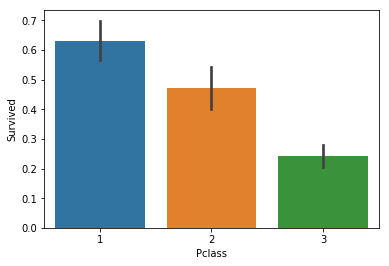

In [19]:
sns.barplot(x="Pclass",y="Survived",data=df);

In [20]:
df.groupby("Pclass")[["Survived"]].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


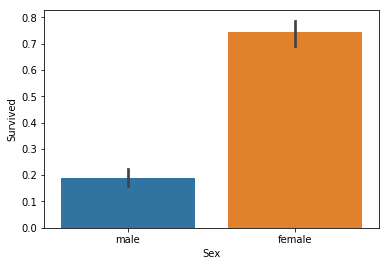

In [21]:
sns.barplot(x="Sex",y="Survived",data=df);

In [22]:
df.groupby("Sex")[["Survived"]].mean()

,Survived
Sex,
female,0.742038
male,0.188908


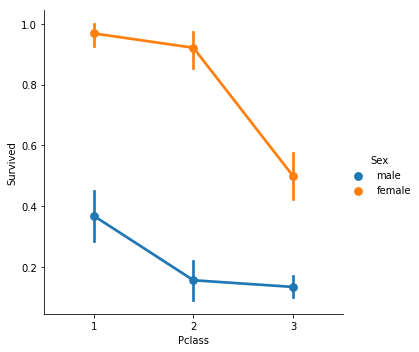

In [23]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)
plt.show()

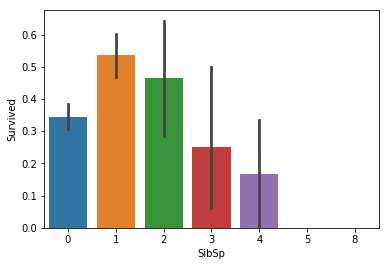

In [24]:
sns.barplot(x="SibSp",y="Survived",data=df);

In [25]:
df.groupby("SibSp")[["Survived"]].mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


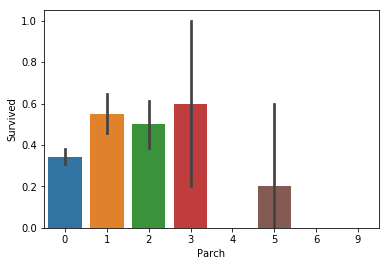

In [26]:
sns.barplot(x="Parch",y="Survived",data=df);

In [27]:
df.groupby("SibSp")[["Survived"]].mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


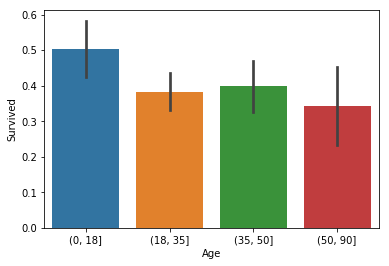

In [28]:
sns.barplot(x=age ,y="Survived", data=train);

In [29]:
train.groupby(age)[["Survived"]].count()

,Survived
Age,
"(0, 18]",139
"(18, 35]",358
"(35, 50]",153
"(50, 90]",64


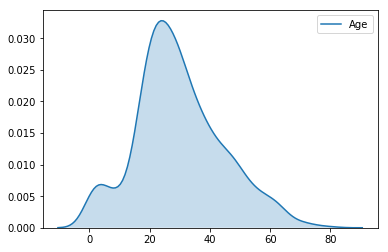

In [30]:
sns.kdeplot(df.Age, shade = True);

# **Data Preparation**

## Deleting Unnecessary Variables

In [31]:
# We can drop the Ticket feature since it is unlikely to have useful information

df = df.drop(['Ticket'], axis = 1)

df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0


## Outlier Treatment

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000


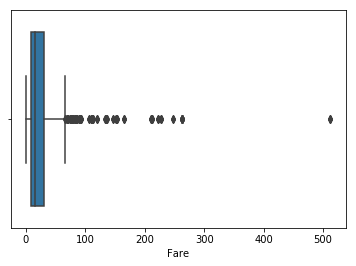

In [33]:
# It looks like there is a problem in Fare max data. Visualize with boxplot.
sns.boxplot(x = df['Fare']);

In [34]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1- 1.5*IQR
lower_limit

upper_limit = Q3 + 1.5*IQR
upper_limit

66.34379999999999

In [35]:
# observations with Fare data higher than the upper limit:

df['Fare'] > (upper_limit)

0       False
1        True
2       False
3       False
4       False
        ...  
1304    False
1305     True
1306    False
1307    False
1308    False
Name: Fare, Length: 1309, dtype: bool

In [36]:
df.sort_values("Fare", ascending=False).head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0
1234,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0
341,24.0,C23 C25 C27,S,263.0000,"Fortune, Miss. Alice Elizabeth",2,342,1,female,3,1.0


In [37]:
# In boxplot, there are too many data higher than upper limit; we can not change all. Just repress the highest value -512- 

df['Fare'] = df['Fare'].replace(512.3292, 300)


In [38]:
df.sort_values("Fare", ascending=False).head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
258,35.0,NaN,C,300.0,"Ward, Miss. Anna",0,259,1,female,0,1.0
679,36.0,B51 B53 B55,C,300.0,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0
1234,58.0,B51 B53 B55,C,300.0,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN
737,35.0,B101,C,300.0,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0
341,24.0,C23 C25 C27,S,263.0,"Fortune, Miss. Alice Elizabeth",2,342,1,female,3,1.0


## Missing Value Treatment

In [39]:
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
dtype: int64

In [40]:
# Missing value of "Survived" is in test data.So it is not important.

### Age

In [41]:
# We can fill the age variable with median.

df["Age"] = df["Age"].fillna(df["Age"].median())

In [42]:
df.isnull().sum()

Age               0
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
dtype: int64

### Embarked

In [43]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [44]:
# Fill NA with the most frequent value:

df["Embarked"] = df["Embarked"].fillna("S")

### Fare

In [45]:
df.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
dtype: int64

In [46]:
df[df["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN


In [47]:
df[["Pclass","Fare"]].groupby("Pclass").mean()

,Fare
Pclass,
1,84.879528
2,21.179196
3,13.302889


In [48]:
# We fill the missing value in fare with the mean of class where Pclass is 3.

df["Fare"] = df["Fare"].fillna(13)

In [49]:
df["Fare"].isnull().sum()

0

### Cabin

In [50]:
# Create CabinBool variable which states if someone has a Cabin data or not:

df["CabinBool"] = (df["Cabin"].notnull().astype('int'))

df = df.drop(['Cabin'], axis = 1)

df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,CabinBool
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,0


In [51]:
df.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
CabinBool        0
dtype: int64

## Variable Transformation

### Embarked

In [52]:
# Map each Embarked value to a numerical value:

embarked_mapping = {"S": 1, "C": 2, "Q": 3}

df["Embarked"] = df["Embarked"].map(embarked_mapping)


In [53]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,CabinBool
0,22.0,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,0
1,38.0,2,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,1
2,26.0,1,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,0
3,35.0,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,1
4,35.0,1,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,0


### Sex

In [54]:
# Convert Sex values into 1-0:

df["Sex"]=df["Sex"].map(lambda x:1 if x== "male" else 0)

In [55]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,CabinBool
0,22.0,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,0
1,38.0,2,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,1
2,26.0,1,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,0
3,35.0,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,1
4,35.0,1,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,0


### Name - Title

In [56]:
df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

In [57]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,CabinBool,Title
0,22.0,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,0,Mr
1,38.0,2,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,1,Mrs
2,26.0,1,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,0,Miss
3,35.0,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,1,Mrs
4,35.0,1,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,0,Mr


In [58]:
df = df.drop(['Name'], axis = 1)

In [59]:
df['Title'] = df['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [60]:
df.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,CabinBool,Title
0,22.0,1,7.2500,0,1,3,1,1,0.0,0,Mr
1,38.0,2,71.2833,0,2,1,0,1,1.0,1,Mrs
2,26.0,1,7.9250,0,3,3,0,0,1.0,0,Miss
3,35.0,1,53.1000,0,4,1,0,1,1.0,1,Mrs
4,35.0,1,8.0500,0,5,3,1,0,0.0,0,Mr


In [61]:
df[["Title","PassengerId"]].groupby("Title").count()

,PassengerId
Title,
Master,61
Miss,264
Mr,757
Mrs,198
Rare,27
Royal,2


In [62]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).agg({"count","mean"})

Survived          
          count      mean
Title                    
Master       40  0.575000
Miss        185  0.702703
Mr          517  0.156673
Mrs         126  0.793651
Rare         21  0.285714
Royal         2  1.000000

In [63]:
# Map each of the title groups to a numerical value

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 5}

df['Title'] = df['Title'].map(title_mapping)


In [64]:
df.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,CabinBool,Title
0,22.0,1,7.2500,0,1,3,1,1,0.0,0,1
1,38.0,2,71.2833,0,2,1,0,1,1.0,1,3
2,26.0,1,7.9250,0,3,3,0,0,1.0,0,2
3,35.0,1,53.1000,0,4,1,0,1,1.0,1,3
4,35.0,1,8.0500,0,5,3,1,0,0.0,0,1


### AgeGroup

In [65]:
# Map Age values into groups of numerical values:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
mylabels = [1, 2, 3, 4, 5, 6, 7]
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = mylabels)
df["AgeGroup"] = df["AgeGroup"].astype("int")

In [66]:
df.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,CabinBool,Title,AgeGroup
0,22.0,1,7.2500,0,1,3,1,1,0.0,0,1,4
1,38.0,2,71.2833,0,2,1,0,1,1.0,1,3,6
2,26.0,1,7.9250,0,3,3,0,0,1.0,0,2,5
3,35.0,1,53.1000,0,4,1,0,1,1.0,1,3,5
4,35.0,1,8.0500,0,5,3,1,0,0.0,0,1,5


In [67]:
#dropping the Age feature for now, might change:
df = df.drop(['Age'], axis = 1)

In [68]:
df.head()

,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,CabinBool,Title,AgeGroup
0,1,7.2500,0,1,3,1,1,0.0,0,1,4
1,2,71.2833,0,2,1,0,1,1.0,1,3,6
2,1,7.9250,0,3,3,0,0,1.0,0,2,5
3,1,53.1000,0,4,1,0,1,1.0,1,3,5
4,1,8.0500,0,5,3,1,0,0.0,0,1,5


### Fare

In [69]:
# Map Fare values into groups of numerical values:
df["FareBand"]=pd.qcut(df["Fare"],4,labels=[1,2,3,4])
df["FareBand"] = df["FareBand"].astype("int")

In [70]:
df=df.drop(["Fare"],axis=1)

In [71]:
df.head()

,Embarked,Parch,PassengerId,Pclass,Sex,SibSp,Survived,CabinBool,Title,AgeGroup,FareBand
0,1,0,1,3,1,1,0.0,0,1,4,1
1,2,0,2,1,0,1,1.0,1,3,6,4
2,1,0,3,3,0,0,1.0,0,2,5,2
3,1,0,4,1,0,1,1.0,1,3,5,4
4,1,0,5,3,1,0,0.0,0,1,5,2


## Feature Engineering

### Family Size

In [72]:
df["FamilySize"]=df["SibSp"]+df["Parch"]+1


In [73]:
df.head()

,Embarked,Parch,PassengerId,Pclass,Sex,SibSp,Survived,CabinBool,Title,AgeGroup,FareBand,FamilySize
0,1,0,1,3,1,1,0.0,0,1,4,1,2
1,2,0,2,1,0,1,1.0,1,3,6,4,2
2,1,0,3,3,0,0,1.0,0,2,5,2,1
3,1,0,4,1,0,1,1.0,1,3,5,4,2
4,1,0,5,3,1,0,0.0,0,1,5,2,1


In [74]:
# Create new feature of family size:

df['Single'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
df['SmallFam'] = df['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
df['MedFam'] = df['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
df['LargeFam'] = df['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

In [75]:
df.head()

,Embarked,Parch,PassengerId,Pclass,Sex,SibSp,Survived,CabinBool,Title,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam
0,1,0,1,3,1,1,0.0,0,1,4,1,2,0,1,0,0
1,2,0,2,1,0,1,1.0,1,3,6,4,2,0,1,0,0
2,1,0,3,3,0,0,1.0,0,2,5,2,1,1,0,0,0
3,1,0,4,1,0,1,1.0,1,3,5,4,2,0,1,0,0
4,1,0,5,3,1,0,0.0,0,1,5,2,1,1,0,0,0


### Embarked & Title

In [76]:
# Convert Title and Embarked into dummy variables:

df = pd.get_dummies(df, columns = ["Title"])
df = pd.get_dummies(df, columns = ["Embarked"], prefix="Em")

In [77]:
df.head()

,Parch,PassengerId,Pclass,Sex,SibSp,Survived,CabinBool,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Em_1,Em_2,Em_3
0,0,1,3,1,1,0.0,0,4,1,2,0,1,0,0,1,0,0,0,0,1,0,0
1,0,2,1,0,1,1.0,1,6,4,2,0,1,0,0,0,0,1,0,0,0,1,0
2,0,3,3,0,0,1.0,0,5,2,1,1,0,0,0,0,1,0,0,0,1,0,0
3,0,4,1,0,1,1.0,1,5,4,2,0,1,0,0,0,0,1,0,0,1,0,0
4,0,5,3,1,0,0.0,0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0


### Pclass

In [78]:
# Create categorical values for Pclass:
df["Pclass"] = df["Pclass"].astype("category")
df= pd.get_dummies(df, columns = ["Pclass"],prefix="Pc")

In [79]:
df.head()

,Parch,PassengerId,Sex,SibSp,Survived,CabinBool,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
0,0,1,1,1,0.0,0,4,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,2,0,1,1.0,1,6,4,2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,0,3,0,0,1.0,0,5,2,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,0,4,0,1,1.0,1,5,4,2,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,5,1,0,0.0,0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


# Machine Learning

## Spliting the train data

In [80]:
train=df[(df.PassengerId <892 )].astype(int)
test=df[(df.PassengerId >891 )]


In [81]:
train

,Parch,PassengerId,Sex,SibSp,Survived,CabinBool,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
0,0,1,1,1,0,0,4,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,2,0,1,1,1,6,4,2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,0,3,0,0,1,0,5,2,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,0,4,0,1,1,1,5,4,2,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,5,1,0,0,0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,887,1,0,0,0,5,2,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0
887,0,888,0,0,1,1,4,3,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
888,2,889,0,1,0,0,5,3,4,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
889,0,890,1,0,1,1,5,3,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [82]:
test

,Parch,PassengerId,Sex,SibSp,Survived,CabinBool,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
891,0,892,1,0,NaN,0,5,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
892,0,893,0,1,NaN,0,6,1,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
893,0,894,1,0,NaN,0,7,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
894,0,895,1,0,NaN,0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
895,1,896,0,1,NaN,0,4,2,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,1305,1,0,NaN,0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1305,0,1306,0,0,NaN,1,6,4,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1306,0,1307,1,0,NaN,0,6,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1307,0,1308,1,0,NaN,0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


## Modeling

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [84]:
def base_models(df):
    
    
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    
    Y = df["Survived"]
    X = df.drop(["Survived","PassengerId"], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)
    
    #results = []
    
    names = ["LogisticRegression","GaussianNB","KNN","LinearSVC","SVC",
             "CART","RF","GBM","XGBoost","LightGBM","CatBoost"]
    
    
    classifiers = [LogisticRegression(),GaussianNB(), KNeighborsClassifier(),LinearSVC(),SVC(),
                  DecisionTreeClassifier(),RandomForestClassifier(), GradientBoostingClassifier(),
                  XGBClassifier(), LGBMClassifier(), CatBoostClassifier(verbose = False)]
    
    
    for name, clf in zip(names, classifiers):

        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        msg = "%s: %f" % (name, acc)
        print(msg)

In [85]:
base_models(train)

LogisticRegression: 0.815642
GaussianNB: 0.810056
KNN: 0.837989
LinearSVC: 0.821229
SVC: 0.826816
CART: 0.804469
RF: 0.826816
GBM: 0.815642
XGBoost: 0.837989
LightGBM: 0.826816
CatBoost: 0.826816


In [86]:
#As showed, xgboost gives the best results.therefore ı want to choise xgboost as a model.

## Model tuning

In [87]:
Y = train["Survived"]
X = train.drop(["Survived","PassengerId"], axis=1)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)
    
xgb_params = {
        'n_estimators': [100, 500, 1000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 14.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

In [88]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [89]:
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(learning_rate = 0.05, 
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.6)
xgb_tuned =  xgb.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8212290502793296

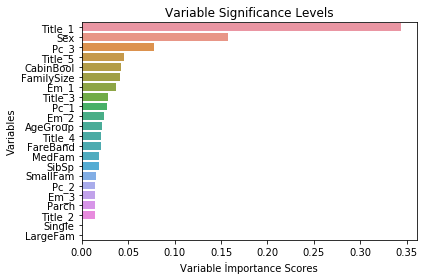

In [90]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Variable İmportance Scores')
plt.ylabel('Variables')
plt.title("Variable Significance Levels")
plt.show()

## deployment

In [91]:
test=test.drop("Survived", axis=1)
test=test.astype(int)

In [92]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = xgb_tuned.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

In [93]:
output.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
